In [1]:
import geopandas as gpd 
import requests 
import pandas as pd
import matplotlib.pyplot as plt 
import json
from shapely.geometry import LineString


%matplotlib inline

In [2]:
with open('../data/WeGo.json')as start:
         credentials = json.load(start)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

In [28]:
params_geo = {
    'direction':'1',
    'startDate':'04-01-2022',
    #'endDate': '04-30-2022',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [29]:
response_geo = requests.get(URL, params = params_geo, headers=headers)

In [30]:
#response_geo.json()

<AxesSubplot:>

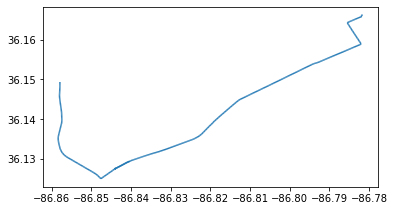

In [31]:
response_line_segments = response_geo.json()['features']
route3_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_gdf.plot()

<AxesSubplot:>

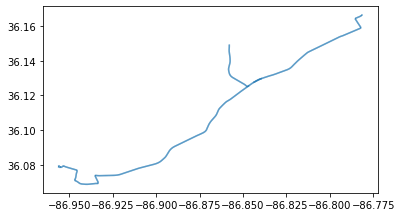

In [34]:
params_geo = {
    'direction':'1',
    'startDate':'04-01-2022',
    'endDate': '04-30-2022',
    'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}
response_geo = requests.get(URL, params = params_geo, headers=headers)
response_line_segments = response_geo.json()['features']
route3_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_gdf.plot()

In [27]:
route3_gdf = gpd.GeoDataFrame.from_features(response_line_segments)
route3_gdf.head(3)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.754000,13.856899,2.502,2.160,1.978,1.890,1.678,1.608,1.347,1.308
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.251979,10.774967,4.896,3.367,2.835,2.298,1.955,1.813,1.591,1.375
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.502800,16.159835,1.740,1.700,1.640,1.591,1.519,1.390,1.325,1.294
